In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats

import warnings
warnings.filterwarnings("ignore")  # to suppress all warnings

In [2]:
df = pd.read_csv("df_no_missing_v1.csv")
df0 = df.copy()

In [3]:
df.head()

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5.0,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
1,1,1,Mercedes-Benz EQE 350,Mercedes-Benz,80900,Compact,Pre-registered,4.0,2,5000.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
2,2,2,Mercedes-Benz A 45 AMG,Mercedes-Benz,69900,Compact,Used,5.0,1,18900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5.0,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5.0,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28217 entries, 0 to 28216
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   28217 non-null  int64  
 1   new_index                    28217 non-null  int64  
 2   make_model                   28217 non-null  object 
 3   make                         28217 non-null  object 
 4   price                        28217 non-null  int64  
 5   body_type                    28217 non-null  object 
 6   type                         28217 non-null  object 
 7   doors                        28217 non-null  float64
 8   warranty                     28217 non-null  int64  
 9   mileage                      28217 non-null  float64
 10  gearbox                      28217 non-null  object 
 11  paint                        28217 non-null  int64  
 12  seller                       28217 non-null  object 
 13  seats           

In [5]:
df.shape

(28217, 33)

In [6]:
df.isna().sum()

Unnamed: 0                     0
new_index                      0
make_model                     0
make                           0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
paint                          0
seller                         0
seats                          0
engine_size                    0
empty_weight                   0
non_smoker_vehicle             0
country                        0
power_kwh                      0
age                            0
new_fuel_type5                 0
co_emissions_2                 0
fuel_consumption_comb_new_3    0
safety_security_kmeans         0
comfort_convenience_kmeans     0
entertainment_kmeans           0
extras_kmeans                  0
general_inspection_2           0
full_service_history_2         0
emission_class_2               0
upholstery

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28217.0,14309.511925,8261.036051,0.0,7160.0,14309.000000,21460.000000,28629.00
new_index,28217.0,14621.623241,8533.036623,0.0,7208.0,14543.000000,22051.000000,29478.00
price,28217.0,23564.694085,26006.552866,490.0,11990.0,17980.000000,27990.000000,1346900.00
doors,28217.0,4.143212,1.210955,1.0,3.0,5.000000,5.000000,6.00
warranty,28217.0,0.663713,0.667823,0.0,0.0,1.000000,1.000000,2.00
mileage,28217.0,72301.373250,66011.942687,0.0,20167.0,57095.000000,106493.000000,999999.00
paint,28217.0,0.510685,0.499895,0.0,0.0,1.000000,1.000000,1.00
seats,28217.0,4.706205,0.802482,1.0,4.0,5.000000,5.000000,17.00
engine_size,28217.0,1748.677517,1044.981367,0.0,1332.0,1598.000000,1984.000000,99900.00
empty_weight,28217.0,1422.194744,316.995453,75.0,1215.0,1388.000000,1590.000000,15590.00


In [8]:
df.warranty.value_counts(dropna=False)

0    12632
1    12442
2     3143
Name: warranty, dtype: int64

In [9]:
df.safety_security_kmeans .value_counts(dropna=False)

Medium    12521
High       8562
Low        7134
Name: safety_security_kmeans, dtype: int64

### Outliers

In [10]:
df.head(1).T

,0
Unnamed: 0,0
new_index,0
make_model,Mercedes-Benz A 160
make,Mercedes-Benz
price,16950
body_type,Compact
type,Used
doors,5.0
warranty,2
mileage,120200.0


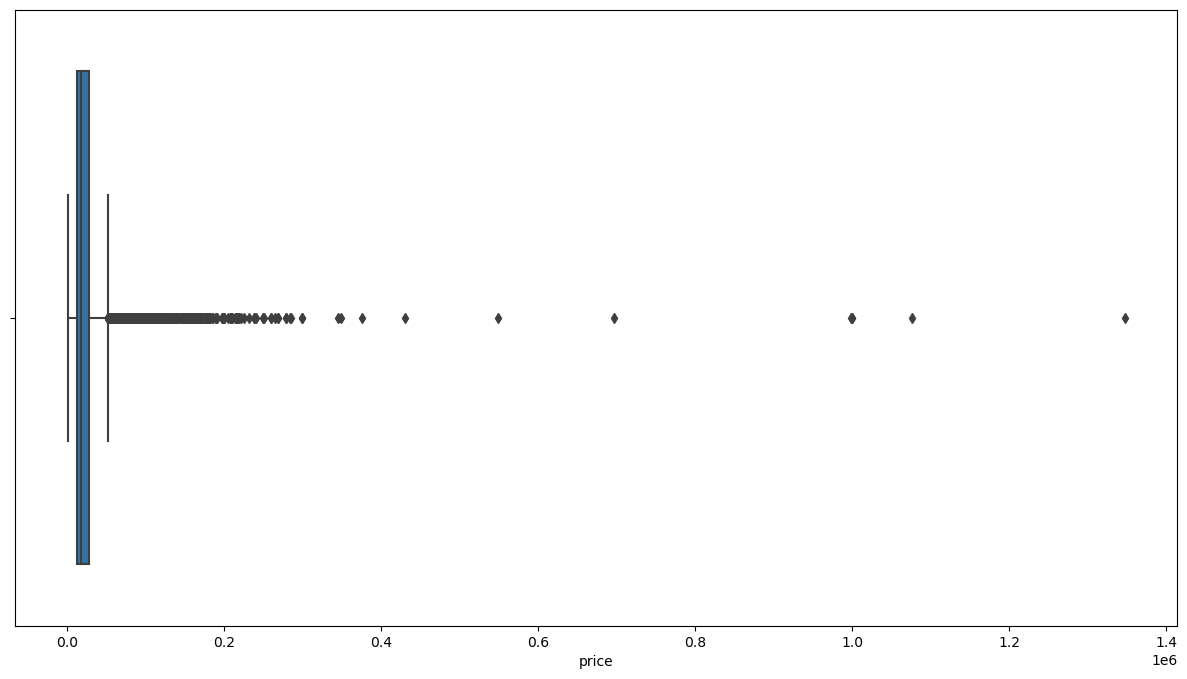

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df['price']);

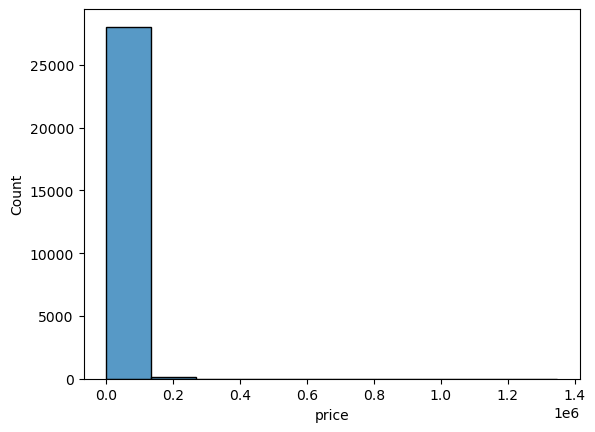

In [12]:
sns.histplot(x = df['price'], bins=10);

In [13]:
np.log(df.price)

0         9.738023
1        11.300969
2        11.154821
3        10.757690
4         9.729134
           ...    
28212    10.534759
28213     8.612322
28214     8.895630
28215    10.305614
28216     8.398410
Name: price, Length: 28217, dtype: float64

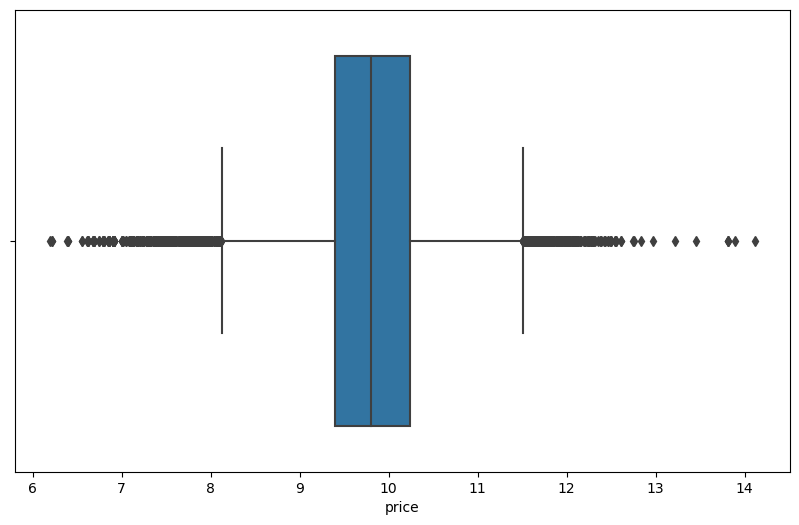

In [14]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = np.log(df.price)); 

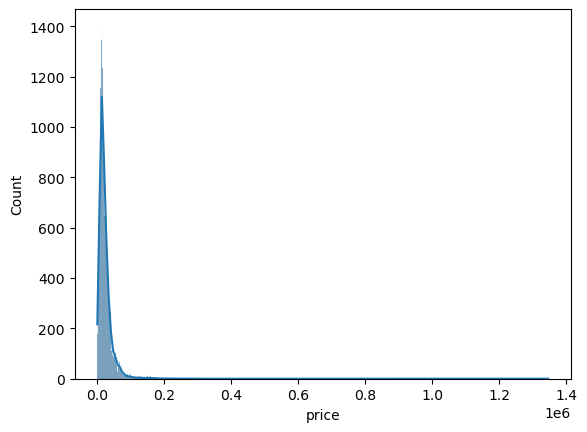

In [15]:
sns.histplot(data=df, x="price", kde=True);

#### Outliers on "price" without log transformation

In [16]:
round(df.price.describe(),2)

count      28217.00
mean       23564.69
std        26006.55
min          490.00
25%        11990.00
50%        17980.00
75%        27990.00
max      1346900.00
Name: price, dtype: float64

In [17]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1
IQR

16000.0

In [18]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(-20010.0, 59990.0)

In [19]:
(df.price > upper_lim).sum()

1241

In [20]:
(df.price<= lower_lim).sum()

0

In [21]:
not_outliers = (df.price <= upper_lim) & (df.price >= lower_lim)

In [22]:
df = df[not_outliers]
df

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5.0,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5.0,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5.0,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3.0,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5.0,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,28625,29474,Volvo S90,Volvo,37600,Sedan,Used,4.0,1,40345.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4.0,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3.0,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4.0,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [23]:
#First - handling outl;ers within the DV

#### Outliers on price_log

#### Removing outliers

In [24]:
df.head(1).T

,0
Unnamed: 0,0
new_index,0
make_model,Mercedes-Benz A 160
make,Mercedes-Benz
price,16950
body_type,Compact
type,Used
doors,5.0
warranty,2
mileage,120200.0


In [25]:
df.doors.value_counts(dropna=False)

5.0    16896
2.0     5142
4.0     2745
3.0     2187
6.0        5
1.0        1
Name: doors, dtype: int64

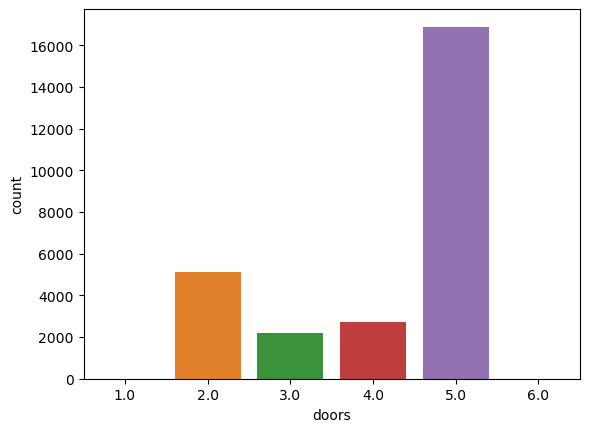

In [26]:
sns.countplot(data=df, x="doors");

In [27]:
df.doors = df.doors.replace({6.0:5.0, 1.0: 2.0})

In [28]:
df.doors = df.doors.astype(int)

In [29]:
df.doors.dtype

dtype('int64')

In [30]:
df.head(1).T

,0
Unnamed: 0,0
new_index,0
make_model,Mercedes-Benz A 160
make,Mercedes-Benz
price,16950
body_type,Compact
type,Used
doors,5
warranty,2
mileage,120200.0


In [31]:
df.warranty.value_counts()

0    12142
1    12034
2     2800
Name: warranty, dtype: int64

### Mileage

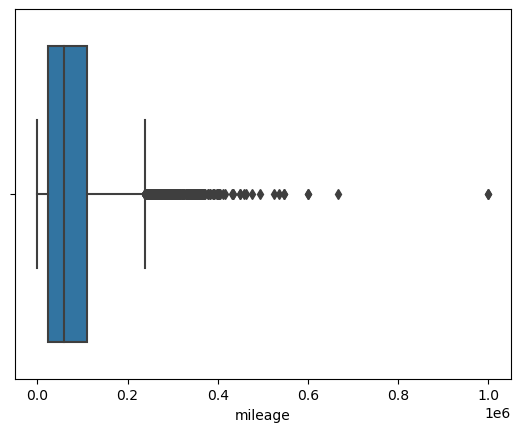

In [32]:
sns.boxplot(data=df, x="mileage");

In [33]:
df.mileage.dtype

dtype('float64')

In [34]:
df.mileage.describe()

count     26976.000000
mean      74430.265384
std       66076.769627
min           0.000000
25%       22597.750000
50%       59907.000000
75%      109065.000000
max      999999.000000
Name: mileage, dtype: float64

In [35]:
Q1 = df.mileage.quantile(0.25)
Q3 = df.mileage.quantile(0.75)

IQR = Q3 - Q1
IQR

86467.25

In [36]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(-150336.75, 281999.5)

In [37]:
(df.mileage> upper_lim).sum()

244

In [38]:
(df.mileage< lower_lim).sum()

0

In [39]:
df.loc[(df.mileage > upper_lim)].sort_values(by="mileage")

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
2717,2755,2758,Opel Corsa,Opel,2975,Compact,Used,5,0,282587.0,...,Low,Low,Low,Low,1,0,Euro 6,Other,Other,No
25450,25827,26556,Volvo C70,Volvo,6450,Convertible,Used,2,0,282900.0,...,Medium,Medium,Low,Medium,2,1,Euro 4,Leather,Other,No
25764,26142,26881,Volvo C70,Volvo,6450,Convertible,Used,2,0,282900.0,...,Medium,Medium,Low,Medium,2,1,Euro 4,Leather,Other,No
15908,16117,16417,Dacia Logan,Dacia,3999,Station wagon,Used,5,0,283000.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
8952,9083,9159,Peugeot 307,Peugeot,1111,Station wagon,Used,5,0,283000.0,...,Low,Low,Low,Low,0,0,Euro 4,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,14360,14594,Skoda Superb,Skoda,4500,Station wagon,Used,5,1,600000.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28053,28463,29295,Volvo S70,Volvo,1345,Sedan,Used,4,0,600001.0,...,Medium,Low,Low,Low,2,1,Euro 6,Leather,Other,No
12958,13153,13343,SEAT Altea XL,SEAT,3400,Station wagon,Used,5,0,667128.0,...,Low,Low,Low,Low,0,0,Euro 4,Other,Other,No
3349,3397,3406,Opel Kadett,Opel,900,Coupe,Used,2,0,999999.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No


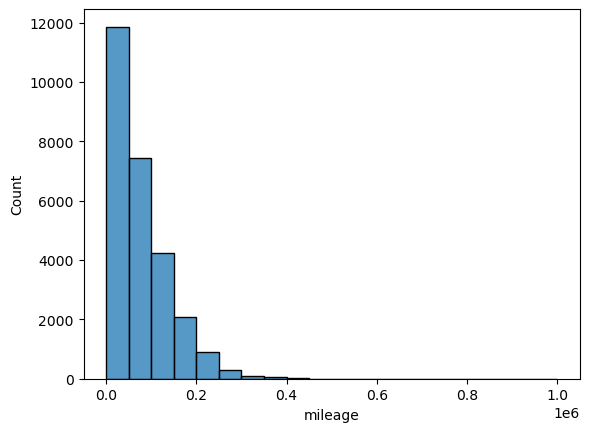

In [40]:
sns.histplot(data=df, x="mileage", bins=20);

In [41]:
not_outliers = df["mileage"] <= upper_lim

In [42]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,28625,29474,Volvo S90,Volvo,37600,Sedan,Used,4,1,40345.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [43]:
df = df[not_outliers]

In [44]:
df.shape[0]

26732

In [45]:
df.mileage.describe()

count     26732.000000
mean      71983.819954
std       60668.965449
min           0.000000
25%       22311.250000
50%       59000.000000
75%      107400.000000
max      281512.000000
Name: mileage, dtype: float64

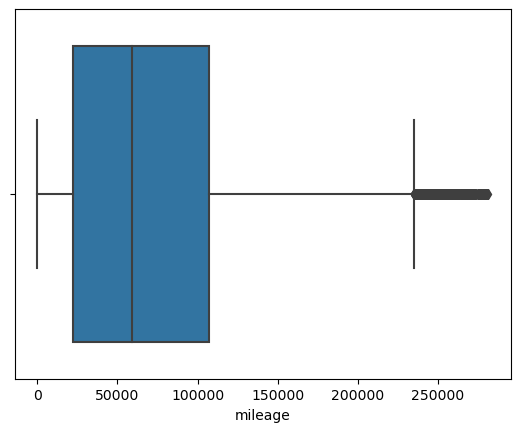

In [46]:
sns.boxplot(x=df.mileage); 
# we have set our outliers based on 2*IQR. 
# The boxplot below shows outliers based on 1.5*IQR

In [47]:
df.gearbox.value_counts()

Manual            16606
Automatic         10068
Semi-automatic       58
Name: gearbox, dtype: int64

In [48]:
df.paint.value_counts()

1    13446
0    13286
Name: paint, dtype: int64

In [49]:
df.rename(columns = {"paint" : "metallic"}, inplace=True)

In [50]:
df.seller.value_counts()

Dealer            24603
Private seller     2129
Name: seller, dtype: int64

In [51]:
df.seller = df.seller.astype("string")

In [52]:
df.seller.dtype

string[python]

In [53]:
df.seats.value_counts()

5.0     19680
4.0      5422
2.0      1076
7.0       438
8.0        43
9.0        33
3.0        23
6.0        10
1.0         5
17.0        2
Name: seats, dtype: int64

In [54]:
df[df.seats==1]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
5109,5173,5196,Renault,Renault,6500,Compact,Used,2,0,21400.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,1 owner,No
5734,5816,5845,Renault Twizy,Renault,3999,Coupe,Used,2,0,91900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
6113,6205,6238,Renault Twizy,Renault,7950,Off-Road/Pick-up,Used,2,1,35784.0,...,Low,Low,Low,Low,0,1,Euro 6,Other,Other,No
7450,7559,7614,Peugeot 308,Peugeot,10750,Convertible,Used,2,1,82000.0,...,Medium,Medium,High,Low,0,1,Euro 6,Leather,Other,No
10178,10325,10428,Fiat 131,Fiat,24500,Coupe,Used,2,0,1.0,...,Low,Low,Low,Low,0,0,Euro 6,Leather,Other,No


In [55]:
df[df.seats==17]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
4241,4294,4309,Opel Movano,Opel,59990,Station wagon,Used,5,0,290.0,...,Medium,Low,Medium,Low,1,1,Euro 6,Other,1 owner,No
4246,4299,4314,Opel Movano,Opel,59990,Station wagon,Used,5,0,300.0,...,Medium,Low,Medium,Low,1,1,Euro 6,Other,1 owner,No


In [56]:
df = df[df['seats'] != 17]

In [57]:
df = df[df['seats'] != 1]

In [58]:
df.seats.value_counts()

5.0    19680
4.0     5422
2.0     1076
7.0      438
8.0       43
9.0       33
3.0       23
6.0       10
Name: seats, dtype: int64

In [59]:
df[df.seats==6]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
1389,1420,1420,Mercedes-Benz G 230,Mercedes-Benz,30800,Off-Road/Pick-up,Used,2,0,100000.0,...,Low,Low,Low,Low,1,0,Euro 2,Leather,1 owner,No
1851,1884,1886,Mercedes-Benz C 43 AMG,Mercedes-Benz,47970,Station wagon,Used,5,0,49974.0,...,High,High,High,High,1,1,Euro 6,Leather,1 owner,No
1879,1912,1914,Mercedes-Benz V 250,Mercedes-Benz,43990,Station wagon,Used,4,0,105000.0,...,High,High,Medium,Medium,2,0,Euro 6,Other,Other,No
2093,2128,2130,Mercedes-Benz C 200,Mercedes-Benz,30870,Sedan,Used,4,0,95412.0,...,High,High,High,Medium,1,1,Euro 6,Leather,Other,No
8603,8732,8802,Peugeot Traveller,Peugeot,59900,Station wagon,Used,5,0,3500.0,...,Low,Medium,Low,Low,0,0,Euro 6,Other,1 owner,No
16856,17073,17419,Toyota Land Cruiser,Toyota,25000,Convertible,Used,3,0,120000.0,...,Low,Low,Low,Low,2,1,Euro 6,Leather,1 owner,No
21124,21421,22009,Ford Fairlane,Ford,49900,Convertible,Used,2,0,99500.0,...,Low,Low,Low,Low,1,0,Euro 6,Leather,Other,No
21511,21814,22415,Ford Mercury,Ford,26750,Coupe,Used,3,0,124000.0,...,Low,Low,Low,Low,2,0,Euro 6,Other,Other,No
22375,22684,23302,Ford Transit Custom,Ford,40450,Station wagon,Pre-registered,4,2,8.0,...,Medium,Medium,Medium,Low,2,0,Euro 6,Other,Other,No
23858,24183,24876,Hyundai Grand Santa Fe,Hyundai,17200,Off-Road/Pick-up,Used,5,0,173000.0,...,High,High,High,High,2,0,Euro 5,Leather,Other,No


In [60]:
df[df.seats==3]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
2672,2710,2713,Opel Corsa,Opel,14990,Compact,Employee's car,5,2,4999.0,...,High,Medium,High,Medium,1,1,Euro 6,Other,1 owner,Yes
2861,2900,2903,Opel Cascada,Opel,26990,Convertible,Used,2,2,34844.0,...,High,High,High,High,0,1,Euro 6,Leather,Other,No
4040,4093,4107,Opel Vivaro,Opel,23980,Station wagon,Used,4,2,61200.0,...,Medium,Medium,High,Medium,1,1,Euro 6,Other,1 owner,No
4360,4413,4431,Opel Astra,Opel,19990,Sedan,Used,4,1,65000.0,...,Medium,Medium,Medium,Medium,1,1,Euro 6,Other,1 owner,No
8679,8808,8880,Peugeot Expert,Peugeot,27399,Station wagon,Used,4,0,17000.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
8735,8864,8937,Peugeot Expert,Peugeot,17500,Station wagon,Used,4,0,61000.0,...,Medium,Low,Low,Low,2,1,Euro 5,Other,1 owner,No
9289,9423,9507,Peugeot Boxer,Peugeot,28990,Sedan,Used,4,1,91000.0,...,Medium,High,Medium,Medium,1,0,Euro 6,Other,1 owner,No
10271,10420,10525,Fiat 500 Abarth,Fiat,28500,Coupe,Pre-registered,3,0,2000.0,...,Medium,Medium,Low,Low,0,0,Euro 6,Other,Other,No
10352,10509,10616,Fiat Coupe,Fiat,11500,Coupe,Used,2,0,111000.0,...,Low,Low,Low,Low,0,0,Euro 2,Leather,Other,No
19907,20169,20690,Nissan NV400,Nissan,19445,Station wagon,Used,5,0,98700.0,...,Medium,Medium,Low,Low,0,1,Euro 6,Other,Other,No


In [61]:
df.seats.replace({3:5, 6:5}, inplace=True)

In [62]:
df.seats.value_counts()

5.0    19713
4.0     5422
2.0     1076
7.0      438
8.0       43
9.0       33
Name: seats, dtype: int64

In [63]:
df.seats = df.seats.astype(int)

In [64]:
df.seats.dtype

dtype('int64')

In [65]:
df.engine_size.dtype

dtype('float64')

In [66]:
df.engine_size.describe()

count    26725.000000
mean      1692.762283
std       1000.075931
min          0.000000
25%       1248.000000
50%       1595.000000
75%       1969.000000
max      99900.000000
Name: engine_size, dtype: float64

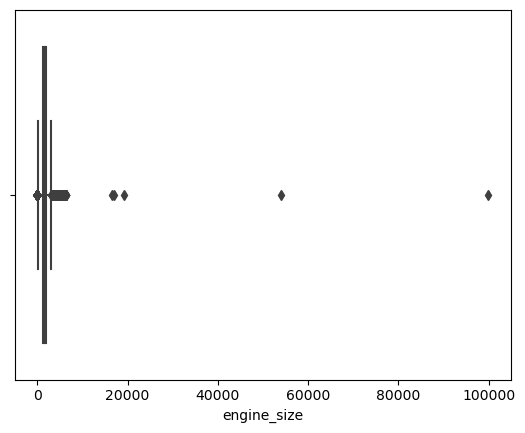

In [67]:
sns.boxplot(data=df, x="engine_size");

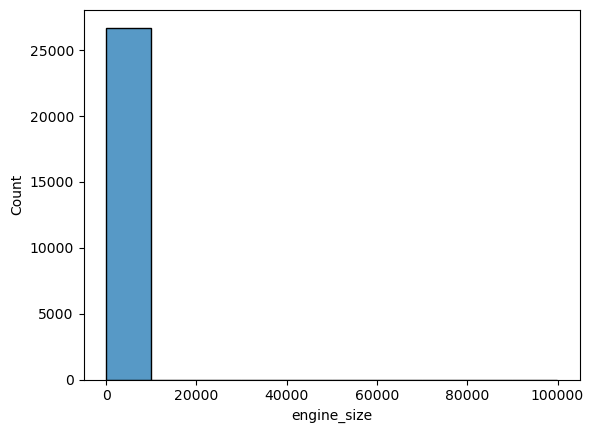

In [68]:
sns.histplot(data=df, x="engine_size", bins=10);

In [69]:
Q1 = df.engine_size.quantile(0.25)
Q3 = df.engine_size.quantile(0.75)

IQR = Q3 - Q1
IQR

721.0

In [70]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(-194.0, 3411.0)

In [71]:
(df.engine_size> upper_lim).sum()

972

In [72]:
(df.engine_size< lower_lim).sum()

0

In [73]:
df.engine_size.describe()

count    26725.000000
mean      1692.762283
std       1000.075931
min          0.000000
25%       1248.000000
50%       1595.000000
75%       1969.000000
max      99900.000000
Name: engine_size, dtype: float64

In [74]:
# df.loc[df.engine_size > 6000, "make_model":"engine_size"].sort_values(by="engine_size")
df.loc[df.engine_size > 7000, "make_model":"engine_size"]["engine_size"].value_counts()

19194.0    1
16998.0    1
16597.0    1
99900.0    1
54009.0    1
Name: engine_size, dtype: int64

In [75]:
# df.loc[df.engine_size <= lower_lim, "make_model":"engine_size"].sort_values(by="engine_size")
df.loc[df.engine_size <= lower_lim, "make_model":"engine_size"]["engine_size"].value_counts()

Series([], Name: engine_size, dtype: int64)

In [76]:
not_outliers = (df["engine_size"] > lower_lim) & (df["engine_size"] <= 7000)

In [77]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,28625,29474,Volvo S90,Volvo,37600,Sedan,Used,4,1,40345.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [78]:
df = df[not_outliers]

In [79]:
df.shape[0]

26720

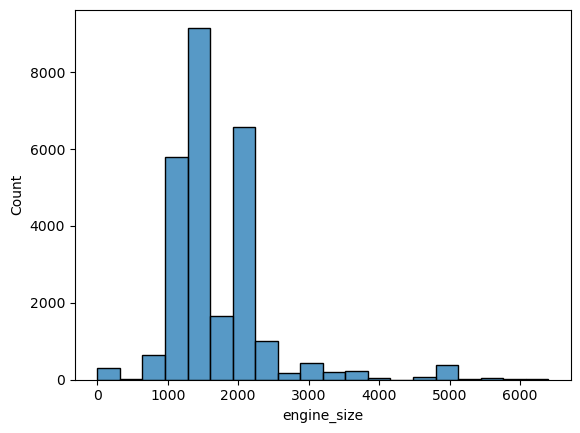

In [80]:
sns.histplot(data=df, x="engine_size", bins=20);

In [81]:
df = df[not_outliers]

In [82]:
df.shape[0]

26720

In [83]:
df.loc[df.engine_size<998, "make_model":"engine_size"]["engine_size"].value_counts().sort_index()

0.0      217
1.0       76
2.0        9
4.0        1
5.0        3
20.0       1
200.0      1
289.0      1
300.0      1
332.0      1
498.0      1
499.0      4
499.5      4
500.0      2
549.0      1
600.0      1
650.0      2
652.0      2
698.0      1
750.0      1
767.0      4
790.0     14
799.0      7
839.0      1
843.0      9
847.0      1
850.0      4
875.0    111
898.0    401
899.0     25
900.0     53
903.0      3
948.5      1
964.0      3
969.5      1
973.0      2
987.0      1
988.0      1
996.0      2
997.0      1
Name: engine_size, dtype: int64

In [84]:
df.loc[df.engine_size==875, "make_model":"engine_size"]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,metallic,seller,seats,engine_size
9377,Fiat 500,Fiat,11490,Compact,Used,3,1,69886.0,Manual,0,Dealer,4,875.0
9395,Fiat 500,Fiat,11490,Compact,Used,2,1,33800.0,Manual,0,Dealer,4,875.0
9460,Fiat Panda,Fiat,12000,Compact,Used,5,1,50535.0,Manual,0,Dealer,4,875.0
9464,Fiat Panda,Fiat,12000,Compact,Used,5,1,56260.0,Manual,1,Dealer,4,875.0
9484,Fiat 500,Fiat,5450,Compact,Used,3,0,121062.0,Manual,0,Dealer,4,875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,Fiat Panda,Fiat,18690,Sedan,Pre-registered,5,2,1.0,Manual,0,Dealer,4,875.0
11566,Fiat 500,Fiat,8999,Sedan,Used,3,2,82000.0,Manual,1,Dealer,4,875.0
11604,Fiat New Panda,Fiat,20900,Sedan,Used,5,0,1.0,Manual,0,Dealer,5,875.0
11631,Fiat Panda,Fiat,8900,Sedan,Used,5,0,99636.0,Manual,0,Dealer,5,875.0


In [85]:
df = df[not_outliers]

In [86]:
df[df.engine_size>=875]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,28625,29474,Volvo S90,Volvo,37600,Sedan,Used,4,1,40345.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [87]:
df = df[df.engine_size>=875]

# Dropped all observations with engines size <875 and >7000

In [88]:
df.empty_weight.describe()

count    26350.000000
mean      1396.720719
std        280.810851
min        347.000000
25%       1205.000000
50%       1370.000000
75%       1561.000000
max      11246.000000
Name: empty_weight, dtype: float64

In [89]:
df = df[df.empty_weight!=11246.00]

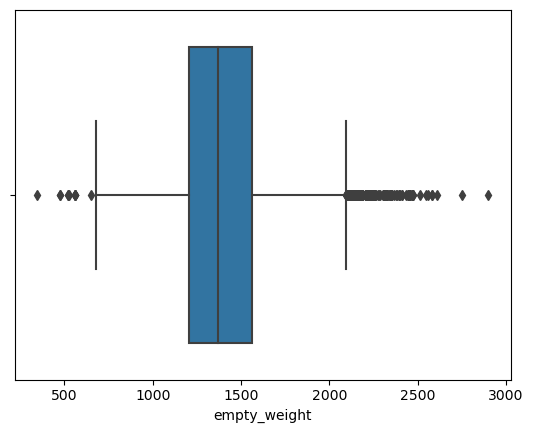

In [90]:
sns.boxplot(data=df, x="empty_weight");

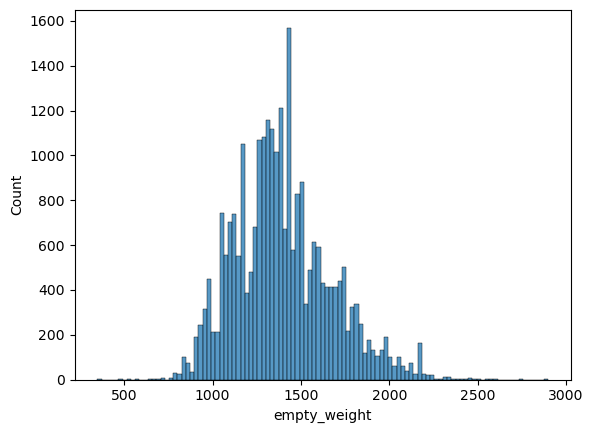

In [91]:
sns.histplot(data=df, x="empty_weight");

In [92]:
Q1 = df.empty_weight.quantile(0.25)
Q3 = df.empty_weight.quantile(0.75)

IQR = Q3 - Q1
IQR

356.0

In [93]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(493.0, 2273.0)

In [94]:
(df.empty_weight> upper_lim).sum()

57

In [95]:
(df.empty_weight< lower_lim).sum()

3

In [96]:
df.loc[df.empty_weight > upper_lim, "make_model":"empty_weight"]["empty_weight"].value_counts()

2350.0    4
2310.0    4
2466.0    3
2326.0    3
2327.5    3
2455.0    3
2410.0    2
2475.0    2
2394.0    2
2580.0    2
2349.0    2
2445.0    2
2345.0    2
2513.0    1
2275.0    1
2443.0    1
2379.0    1
2306.0    1
2282.0    1
2288.0    1
2381.0    1
2318.0    1
2365.0    1
2900.0    1
2400.0    1
2355.0    1
2450.0    1
2305.0    1
2320.0    1
2435.0    1
2610.0    1
2335.0    1
2545.0    1
2315.0    1
2559.0    1
2750.0    1
Name: empty_weight, dtype: int64

In [97]:
df.loc[df.empty_weight < lower_lim, "make_model":"empty_weight"]["empty_weight"].value_counts()

473.0    1
474.0    1
347.0    1
Name: empty_weight, dtype: int64

In [98]:
df = df[df["empty_weight"]>lower_lim]

In [99]:
df.empty_weight.describe()

count    26346.000000
mean      1396.456803
std        274.003425
min        517.500000
25%       1205.000000
50%       1370.000000
75%       1561.000000
max       2900.000000
Name: empty_weight, dtype: float64

In [100]:
# dropped observations lower than the lower limit and the maximum

In [101]:
df.non_smoker_vehicle.value_counts()

0    15770
1    10576
Name: non_smoker_vehicle, dtype: int64

In [102]:
df.country = df.country.astype("string")

In [103]:
df.country.dtype

string[python]

In [104]:
df.power_kwh.describe()

count    26346.000000
mean       112.227701
std         54.670743
min          1.000000
25%         80.000000
50%         97.000000
75%        132.000000
max        662.000000
Name: power_kwh, dtype: float64

In [105]:
df.loc[df.power_kwh < 20, ["make_model", "body_type", "age", "new_fuel_type5",  "power_kwh"]]

,make_model,body_type,age,new_fuel_type5,power_kwh
3232,Opel Kadett,Coupe,46.0,Benzine,1.0
4785,Renault Twizy,Compact,10.0,Electric,12.0
5078,Renault Twizy,Compact,0.0,Electric,9.0
5362,Renault Twizy,Convertible,5.0,Electric,1.0
5473,Renault Megane,Convertible,16.0,Benzine,7.0
5668,Renault Twizy,Coupe,10.0,Electric,4.0
5752,Renault Megane,Coupe,9.0,Benzine,12.0
5832,Renault Twizy,Coupe,8.0,Electric,8.0
5849,Renault Twizy,Coupe,2.0,Electric,4.0
5864,Renault Megane,Coupe,15.0,Diesel,8.0


In [106]:
df= df[df["power_kwh"]!=1]

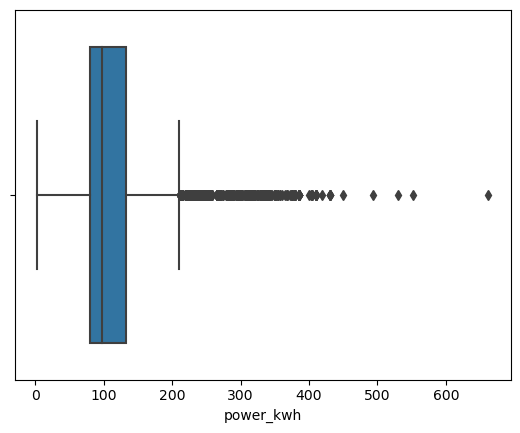

In [107]:
sns.boxplot(data=df, x="power_kwh");

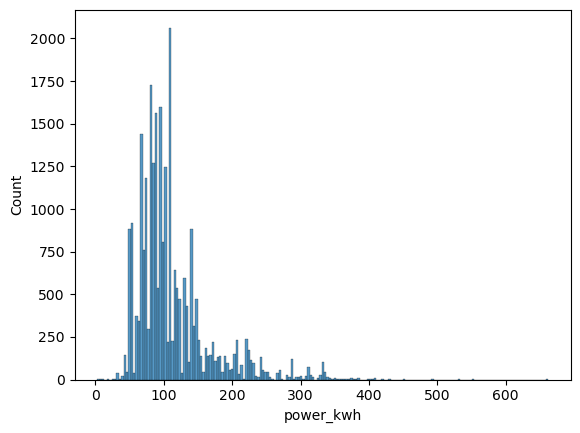

In [108]:
sns.histplot(data=df, x="power_kwh");

In [109]:
Q1 = df.power_kwh.quantile(0.25)
Q3 = df.power_kwh.quantile(0.75)

IQR = Q3 - Q1
IQR

52.0

In [110]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(-24.0, 236.0)

In [111]:
(df.power_kwh> upper_lim).sum()

1044

In [112]:
(df.power_kwh< lower_lim).sum()

0

In [113]:
df.loc[df.power_kwh > upper_lim, "make_model":"power_kwh"]["power_kwh"].value_counts().sort_index()

237.0      1
239.0     10
240.0      7
241.0    117
242.0      1
        ... 
450.0      1
493.0      1
530.0      1
552.0      1
662.0      1
Name: power_kwh, Length: 84, dtype: int64

In [114]:
df.loc[df.power_kwh < lower_lim, "make_model":"power_kwh"]["power_kwh"].value_counts().sort_index()

Series([], Name: power_kwh, dtype: int64)

In [115]:
df.loc[df.power_kwh < 20, ["make_model", "body_type", "age", "new_fuel_type5",  "power_kwh"]]

,make_model,body_type,age,new_fuel_type5,power_kwh
4785,Renault Twizy,Compact,10.0,Electric,12.0
5078,Renault Twizy,Compact,0.0,Electric,9.0
5473,Renault Megane,Convertible,16.0,Benzine,7.0
5668,Renault Twizy,Coupe,10.0,Electric,4.0
5752,Renault Megane,Coupe,9.0,Benzine,12.0
5832,Renault Twizy,Coupe,8.0,Electric,8.0
5849,Renault Twizy,Coupe,2.0,Electric,4.0
5864,Renault Megane,Coupe,15.0,Diesel,8.0
7920,Peugeot,Coupe,92.0,Benzine,17.0
9126,Peugeot 504,Sedan,76.0,Benzine,7.0


In [116]:
not_outliers = (df["power_kwh"] >= lower_lim) & (df["power_kwh"] <= upper_lim)

In [117]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28211,28624,29472,Volvo S60,Volvo,4999,Sedan,Used,4,1,166512.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [118]:
df = df[not_outliers]

In [119]:
df.price.corr(df.power_kwh)

0.5558151636501883

In [120]:
df.age.describe()

count    25298.000000
mean         6.673018
std          7.988961
min       -180.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        122.000000
Name: age, dtype: float64

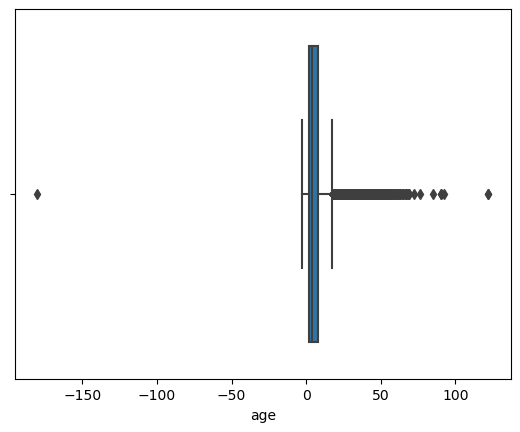

In [121]:
sns.boxplot(data=df, x="age");

In [122]:
df = df[df.age>0]

In [123]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1
IQR

6.0

In [124]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(-9.0, 21.0)

In [125]:
(df.age> upper_lim).sum()

1195

In [126]:
(df.age< lower_lim).sum()

0

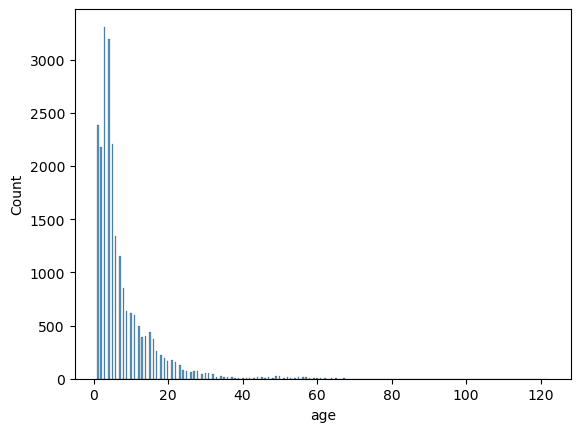

In [127]:
sns.histplot(data=df, x="age");

In [128]:
df.loc[df.age > upper_lim, "make_model":"age"]["age"].value_counts().sort_index()

22.0     154
23.0     126
24.0      83
25.0      68
26.0      59
27.0      72
28.0      69
29.0      45
30.0      52
31.0      51
32.0      48
33.0      18
34.0      23
35.0      19
36.0      16
37.0      13
38.0       8
39.0       9
40.0       7
41.0       8
42.0       5
43.0      11
44.0      18
45.0      12
46.0       8
47.0      13
48.0       6
49.0      24
50.0      21
51.0       6
52.0      12
53.0      10
54.0       6
55.0      14
56.0      18
57.0      13
58.0       9
59.0       4
60.0       3
61.0       5
62.0       3
63.0       2
64.0       3
65.0       3
66.0       1
67.0       6
68.0       1
69.0       2
72.0       1
76.0       1
85.0       1
90.0       2
92.0       1
122.0      2
Name: age, dtype: int64

In [129]:
df.loc[df.age < lower_lim, "make_model":"age"]["age"].value_counts().sort_index()

Series([], Name: age, dtype: int64)

In [130]:
not_outliers = (df["age"] >= lower_lim) & (df["age"] <= upper_lim)

In [131]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28211,28624,29472,Volvo S60,Volvo,4999,Sedan,Used,4,1,166512.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No
28215,28628,29477,Volvo S90,Volvo,29900,Sedan,Used,4,1,94343.0,...,Medium,Medium,High,Low,1,1,Euro 6,Leather,Other,No


In [132]:
df = df[not_outliers]

In [133]:
# dropped negative values because age cannot be lower than zero. 
# checked the mileage and decided they were not new vehicles
# finally dropped any observation with age greater than the upper limit

In [134]:
df.age = df.age.astype(int)

In [135]:
df.new_fuel_type5.value_counts()

Benzine     11889
Diesel       7897
Hybrid       1051
Electric      456
LPG/CNG       297
Name: new_fuel_type5, dtype: int64

In [136]:

df.rename(columns={'new_fuel_type5': 'fuel_type'}, inplace=True)

In [137]:
df.fuel_type = df.fuel_type.astype("string")

In [138]:
df.fuel_type.dtype

string[python]

In [139]:
df.columns

Index(['Unnamed: 0', 'new_index', 'make_model', 'make', 'price', 'body_type',
       'type', 'doors', 'warranty', 'mileage', 'gearbox', 'metallic', 'seller',
       'seats', 'engine_size', 'empty_weight', 'non_smoker_vehicle', 'country',
       'power_kwh', 'age', 'fuel_type', 'co_emissions_2',
       'fuel_consumption_comb_new_3', 'safety_security_kmeans',
       'comfort_convenience_kmeans', 'entertainment_kmeans', 'extras_kmeans',
       'general_inspection_2', 'full_service_history_2', 'emission_class_2',
       'upholstery_2', 'previous_owner_2', 'taxi_or_rental_car_2'],
      dtype='object')

In [140]:
df.rename(columns={'co_emissions_2': 'co2_emissions'}, inplace=True)

In [141]:
df.co2_emissions.describe()

count    21590.000000
mean       132.352365
std         39.796321
min          1.000000
25%        109.000000
50%        124.000000
75%        148.000000
max        954.000000
Name: co2_emissions, dtype: float64

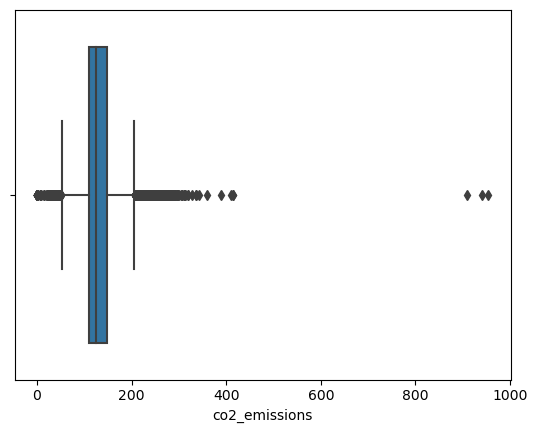

In [142]:
sns.boxplot(data=df, x="co2_emissions");

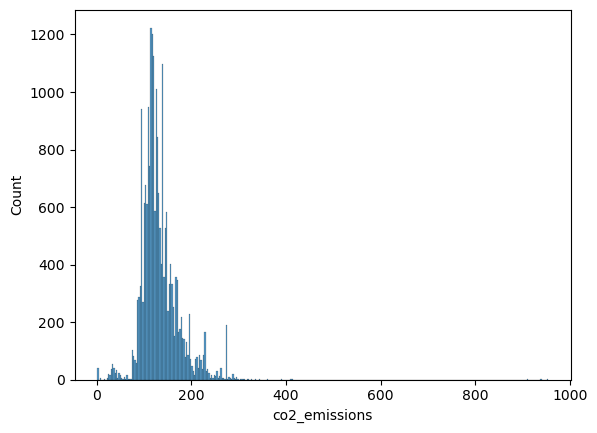

In [143]:
sns.histplot(data=df, x="co2_emissions");

In [144]:
Q1 = df.co2_emissions.quantile(0.25)
Q3 = df.co2_emissions.quantile(0.75)

IQR = Q3 - Q1
IQR

39.0

In [145]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(31.0, 226.0)

In [146]:
(df.co2_emissions> upper_lim).sum()

687

In [147]:
(df.co2_emissions< lower_lim).sum()

98

In [148]:
df.loc[df.co2_emissions > upper_lim, "make_model":"co2_emissions"]["co2_emissions"].value_counts().sort_index()

227.0      7
227.5      2
228.0      5
229.0     45
230.0    112
        ... 
410.0      1
414.0      2
910.0      1
940.0      1
954.0      1
Name: co2_emissions, Length: 74, dtype: int64

In [149]:
df.loc[df.co2_emissions < lower_lim, "make_model":"co2_emissions"]["co2_emissions"].value_counts().sort_index()

1.0     40
7.0      2
8.0      2
15.0     3
22.0     6
23.0     1
24.0     2
26.0    19
27.0     7
28.0     8
29.0     5
30.0     3
Name: co2_emissions, dtype: int64

In [150]:
not_outliers = (df["co2_emissions"] >= lower_lim) & (df["co2_emissions"] <= upper_lim)

In [151]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28210,28623,29471,Volvo V40,Volvo,13000,Sedan,Used,5,0,114000.0,...,High,Medium,Medium,High,2,1,Euro 6,Other,1 owner,No
28211,28624,29472,Volvo S60,Volvo,4999,Sedan,Used,4,1,166512.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No


In [152]:
df = df[not_outliers]

In [153]:
df.fuel_consumption_comb_new_3

0        3.800000
3        6.665000
4        4.900000
5        8.200000
6        6.120000
           ...   
28210    3.784615
28211    9.775000
28213    9.100000
28214    4.100000
28215    6.757143
Name: fuel_consumption_comb_new_3, Length: 20805, dtype: float64

In [154]:
df.rename(columns={'fuel_consumption_comb_new_3': 'fuel_consumption_comb'}, inplace=True)

In [155]:
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_comb'] *= 0.3
df.loc[df['fuel_type'] == 'Benzine', 'fuel_consumption_comb'] *= 33.6
df.loc[df['fuel_type'] == 'Diesel', 'fuel_consumption_comb'] *= 38.6
df.loc[df['fuel_type'] == 'Hybrid', 'fuel_consumption_comb'] *= 0.5
df.loc[df['fuel_type'] == 'LPG/CNG', 'fuel_consumption_comb'] *= 25.5

In [156]:
df.fuel_consumption_comb.describe()

count    20805.000000
mean       176.405221
std         68.523157
min          0.000000
25%        154.320000
50%        177.131111
75%        211.680000
max       1518.524000
Name: fuel_consumption_comb, dtype: float64

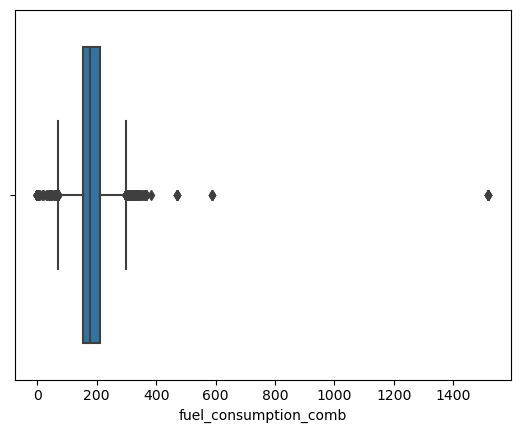

In [157]:
sns.boxplot(data=df, x="fuel_consumption_comb");

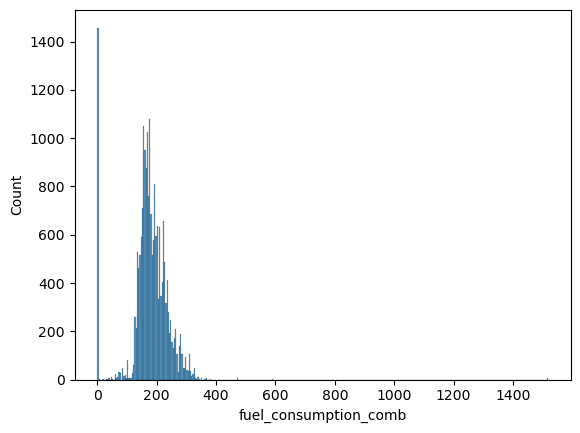

In [158]:
sns.histplot(data=df, x="fuel_consumption_comb");

In [159]:
Q1 = df.fuel_consumption_comb.quantile(0.25)
Q3 = df.fuel_consumption_comb.quantile(0.75)

IQR = Q3 - Q1
IQR

57.359999999999985

In [160]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR

lower_lim, upper_lim

(39.60000000000002, 326.4)

In [161]:
(df.fuel_consumption_comb> upper_lim).sum()

85

In [162]:
(df.fuel_consumption_comb< lower_lim).sum()

1470

In [163]:
df.loc[df.fuel_consumption_comb > upper_lim, "make_model":"fuel_consumption_comb"]["fuel_consumption_comb"].value_counts().sort_index()

326.813333      3
328.100000     23
328.440000      4
329.280000      1
332.640000      4
333.890000      1
335.820000      3
337.106667      2
340.732727      9
343.218333      1
351.260000      5
361.553333      4
362.840000      2
366.700000      5
382.140000      1
470.400000      6
588.672000      4
1518.524000     7
Name: fuel_consumption_comb, dtype: int64

In [164]:
df.loc[df.fuel_consumption_comb < lower_lim, "make_model":"fuel_consumption_comb"]["fuel_consumption_comb"].value_counts().sort_index()

0.000000     56
0.052500     16
0.120000      3
0.161250      8
0.282857      7
             ..
19.300000     1
20.160000     1
30.240000     1
33.600000     1
39.565000     5
Name: fuel_consumption_comb, Length: 168, dtype: int64

In [165]:
not_outliers = (df["fuel_consumption_comb"] >= lower_lim) & (df["fuel_consumption_comb"] <= upper_lim)

In [166]:
df[not_outliers]

,Unnamed: 0,new_index,make_model,make,price,body_type,type,doors,warranty,mileage,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,emission_class_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2
0,0,0,Mercedes-Benz A 160,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,...,Low,Low,Low,Low,0,0,Euro 5,Other,Other,No
3,3,3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
4,4,4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,...,Low,Low,Medium,Low,0,0,Euro 6,Other,Other,No
5,5,5,Mercedes-Benz C 160,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,...,Medium,Medium,Low,Medium,1,1,Euro 6,Other,Other,No
6,7,7,Mercedes-Benz A 220,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,...,Low,Low,Low,Low,0,0,Euro 6,Other,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,28622,29470,Volvo S90,Volvo,27190,Sedan,Used,4,1,93757.0,...,Medium,Low,Low,Low,0,0,Euro 6,Other,Other,No
28210,28623,29471,Volvo V40,Volvo,13000,Sedan,Used,5,0,114000.0,...,High,Medium,Medium,High,2,1,Euro 6,Other,1 owner,No
28213,28626,29475,Volvo S40,Volvo,5499,Sedan,Used,4,0,145000.0,...,Medium,Medium,Low,Low,2,1,Euro 4,Other,Other,No
28214,28627,29476,Volvo C30,Volvo,7300,Sedan,Used,3,2,96000.0,...,Medium,Medium,Medium,Low,0,1,Euro 4,Other,1 owner,No


In [167]:
df = df[not_outliers]

In [168]:
# we dropped all outliers from both ends

In [169]:
df.columns

Index(['Unnamed: 0', 'new_index', 'make_model', 'make', 'price', 'body_type',
       'type', 'doors', 'warranty', 'mileage', 'gearbox', 'metallic', 'seller',
       'seats', 'engine_size', 'empty_weight', 'non_smoker_vehicle', 'country',
       'power_kwh', 'age', 'fuel_type', 'co2_emissions',
       'fuel_consumption_comb', 'safety_security_kmeans',
       'comfort_convenience_kmeans', 'entertainment_kmeans', 'extras_kmeans',
       'general_inspection_2', 'full_service_history_2', 'emission_class_2',
       'upholstery_2', 'previous_owner_2', 'taxi_or_rental_car_2'],
      dtype='object')

In [170]:
df.emission_class_2.value_counts()

Euro 6    15518
Euro 5     2080
Euro 4     1363
Euro 3      268
Euro 2       12
Euro 1        9
Name: emission_class_2, dtype: int64

In [171]:
# Euro'lar silinecek

In [172]:
df.taxi_or_rental_car_2.value_counts()

No     19033
Yes      217
Name: taxi_or_rental_car_2, dtype: int64

In [173]:
df.taxi_or_rental_car_2 = df.taxi_or_rental_car_2.astype("string")

In [174]:
df.columns

Index(['Unnamed: 0', 'new_index', 'make_model', 'make', 'price', 'body_type',
       'type', 'doors', 'warranty', 'mileage', 'gearbox', 'metallic', 'seller',
       'seats', 'engine_size', 'empty_weight', 'non_smoker_vehicle', 'country',
       'power_kwh', 'age', 'fuel_type', 'co2_emissions',
       'fuel_consumption_comb', 'safety_security_kmeans',
       'comfort_convenience_kmeans', 'entertainment_kmeans', 'extras_kmeans',
       'general_inspection_2', 'full_service_history_2', 'emission_class_2',
       'upholstery_2', 'previous_owner_2', 'taxi_or_rental_car_2'],
      dtype='object')

In [175]:
df["safety_security_kmeans"].info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: safety_security_kmeans
Non-Null Count  Dtype 
--------------  ----- 
19250 non-null  object
dtypes: object(1)
memory usage: 300.8+ KB


In [176]:
df["safety_security_kmeans"] = df["safety_security_kmeans"].astype("string")

In [177]:
df.comfort_convenience_kmeans.value_counts()

Low       8307
Medium    6418
High      4525
Name: comfort_convenience_kmeans, dtype: int64

In [178]:
df["comfort_convenience_kmeans"] = df["comfort_convenience_kmeans"].astype("string")

In [179]:
df["comfort_convenience_kmeans"].info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: comfort_convenience_kmeans
Non-Null Count  Dtype 
--------------  ----- 
19250 non-null  string
dtypes: string(1)
memory usage: 300.8 KB


In [180]:
df.general_inspection_2.info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: general_inspection_2
Non-Null Count  Dtype
--------------  -----
19250 non-null  int64
dtypes: int64(1)
memory usage: 300.8 KB


In [181]:
df.full_service_history_2.value_counts() # 0- no fs history, 1 - there is one

0    11110
1     8140
Name: full_service_history_2, dtype: int64

In [182]:
df.full_service_history_2.info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: full_service_history_2
Non-Null Count  Dtype
--------------  -----
19250 non-null  int64
dtypes: int64(1)
memory usage: 300.8 KB


In [183]:
df['upholstery_2'].value_counts() # 0  other, 1 - leather

Other      13946
Leather     5304
Name: upholstery_2, dtype: int64

In [184]:
df['upholstery_2'] = df['upholstery_2'].astype("string")

In [185]:
df['previous_owner_2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: previous_owner_2
Non-Null Count  Dtype 
--------------  ----- 
19250 non-null  object
dtypes: object(1)
memory usage: 300.8+ KB


In [186]:
df['previous_owner_2'] = df['previous_owner_2'].astype("string")

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19250 entries, 0 to 28215
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  19250 non-null  int64  
 1   new_index                   19250 non-null  int64  
 2   make_model                  19250 non-null  object 
 3   make                        19250 non-null  object 
 4   price                       19250 non-null  int64  
 5   body_type                   19250 non-null  object 
 6   type                        19250 non-null  object 
 7   doors                       19250 non-null  int64  
 8   warranty                    19250 non-null  int64  
 9   mileage                     19250 non-null  float64
 10  gearbox                     19250 non-null  object 
 11  metallic                    19250 non-null  int64  
 12  seller                      19250 non-null  string 
 13  seats                       192

In [188]:
df["extras_kmeans"].info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: extras_kmeans
Non-Null Count  Dtype 
--------------  ----- 
19250 non-null  object
dtypes: object(1)
memory usage: 300.8+ KB


In [189]:
df["extras_kmeans"] = df["extras_kmeans"].astype("string")

In [190]:
df["emission_class_2"].value_counts()

Euro 6    15518
Euro 5     2080
Euro 4     1363
Euro 3      268
Euro 2       12
Euro 1        9
Name: emission_class_2, dtype: int64

In [191]:
df["emission_class_2"] = df["emission_class_2"].astype("string")

In [192]:
df["emission_class_euro"] = df["emission_class_2"].str.strip("Euro ")

In [193]:
df["emission_class_euro"]= df["emission_class_euro"].astype(int)

In [194]:
df["emission_class_euro"].info()

<class 'pandas.core.series.Series'>
Int64Index: 19250 entries, 0 to 28215
Series name: emission_class_euro
Non-Null Count  Dtype
--------------  -----
19250 non-null  int64
dtypes: int64(1)
memory usage: 300.8 KB


In [195]:
df["safety_security_kmeans"].value_counts()

Medium    9889
High      4952
Low       4409
Name: safety_security_kmeans, dtype: Int64

In [196]:
decode = {"Low" : 0, "Medium" : 1, "High" : 2 } #standardize the tricategorical variables

In [197]:
df["safety_security_kmeans"] = df["safety_security_kmeans"].map(decode)

In [198]:
df["safety_security_kmeans"].value_counts()

1    9889
2    4952
0    4409
Name: safety_security_kmeans, dtype: int64

In [199]:
#df["safety_security_kmeans"] = df0["safety_security_kmeans"]

In [200]:
df["comfort_convenience_kmeans"] = df["comfort_convenience_kmeans"].map(decode)

In [201]:
df["comfort_convenience_kmeans"].value_counts()

0    8307
1    6418
2    4525
Name: comfort_convenience_kmeans, dtype: int64

In [202]:
df["entertainment_kmeans"] = df["entertainment_kmeans"].map(decode)

In [203]:
df["entertainment_kmeans"].value_counts()

0    8204
1    6409
2    4637
Name: entertainment_kmeans, dtype: int64

In [204]:
df["extras_kmeans"] = df["extras_kmeans"].map(decode)

In [205]:
df["extras_kmeans"].value_counts()

0    11124
1     5705
2     2421
Name: extras_kmeans, dtype: int64

In [206]:
df.head(1).T

,0
Unnamed: 0,0
new_index,0
make_model,Mercedes-Benz A 160
make,Mercedes-Benz
price,16950
body_type,Compact
type,Used
doors,5
warranty,2
mileage,120200.0


In [207]:
df.drop(columns = ["emission_class_2", "Unnamed: 0", "make_model", "new_index"], inplace = True, axis = 1 )

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19250 entries, 0 to 28215
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make                        19250 non-null  object 
 1   price                       19250 non-null  int64  
 2   body_type                   19250 non-null  object 
 3   type                        19250 non-null  object 
 4   doors                       19250 non-null  int64  
 5   warranty                    19250 non-null  int64  
 6   mileage                     19250 non-null  float64
 7   gearbox                     19250 non-null  object 
 8   metallic                    19250 non-null  int64  
 9   seller                      19250 non-null  string 
 10  seats                       19250 non-null  int64  
 11  engine_size                 19250 non-null  float64
 12  empty_weight                19250 non-null  float64
 13  non_smoker_vehicle          192

In [209]:
df.gearbox.value_counts()

Manual            13385
Automatic          5831
Semi-automatic       34
Name: gearbox, dtype: int64

In [210]:
df.make.value_counts()

Volvo            2458
Opel             1919
Peugeot          1862
Renault          1816
Fiat             1573
SEAT             1491
Skoda            1282
Hyundai          1276
Nissan           1269
Dacia            1199
Ford             1177
Mercedes-Benz    1134
Toyota            794
Name: make, dtype: int64

In [211]:
df_final = df.copy()
df_final

,make,price,body_type,type,doors,warranty,mileage,gearbox,metallic,seller,...,safety_security_kmeans,comfort_convenience_kmeans,entertainment_kmeans,extras_kmeans,general_inspection_2,full_service_history_2,upholstery_2,previous_owner_2,taxi_or_rental_car_2,emission_class_euro
0,Mercedes-Benz,16950,Compact,Used,5,2,120200.0,Manual,1,Dealer,...,0,0,0,0,0,0,Other,Other,No,5
3,Mercedes-Benz,46990,Compact,Used,5,1,18995.0,Automatic,0,Dealer,...,0,0,0,0,0,0,Other,Other,No,6
4,Mercedes-Benz,16800,Compact,Used,5,1,197000.0,Automatic,1,Dealer,...,0,0,1,0,0,0,Other,Other,No,6
5,Mercedes-Benz,4690,Compact,Used,3,0,165000.0,Manual,1,Dealer,...,1,1,0,1,1,1,Other,Other,No,6
6,Mercedes-Benz,26900,Compact,Used,5,2,48900.0,Automatic,1,Dealer,...,0,0,0,0,0,0,Other,Other,No,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,Volvo,27190,Sedan,Used,4,1,93757.0,Automatic,0,Dealer,...,1,0,0,0,0,0,Other,Other,No,6
28210,Volvo,13000,Sedan,Used,5,0,114000.0,Manual,1,Private seller,...,2,1,1,2,2,1,Other,1 owner,No,6
28213,Volvo,5499,Sedan,Used,4,0,145000.0,Automatic,0,Dealer,...,1,1,0,0,2,1,Other,Other,No,4
28214,Volvo,7300,Sedan,Used,3,2,96000.0,Manual,1,Dealer,...,1,1,1,0,0,1,Other,1 owner,No,4


In [212]:
df.columns

Index(['make', 'price', 'body_type', 'type', 'doors', 'warranty', 'mileage',
       'gearbox', 'metallic', 'seller', 'seats', 'engine_size', 'empty_weight',
       'non_smoker_vehicle', 'country', 'power_kwh', 'age', 'fuel_type',
       'co2_emissions', 'fuel_consumption_comb', 'safety_security_kmeans',
       'comfort_convenience_kmeans', 'entertainment_kmeans', 'extras_kmeans',
       'general_inspection_2', 'full_service_history_2', 'upholstery_2',
       'previous_owner_2', 'taxi_or_rental_car_2', 'emission_class_euro'],
      dtype='object')

In [214]:
df_final.to_csv("final_scout_not_dummy.csv", index=False)

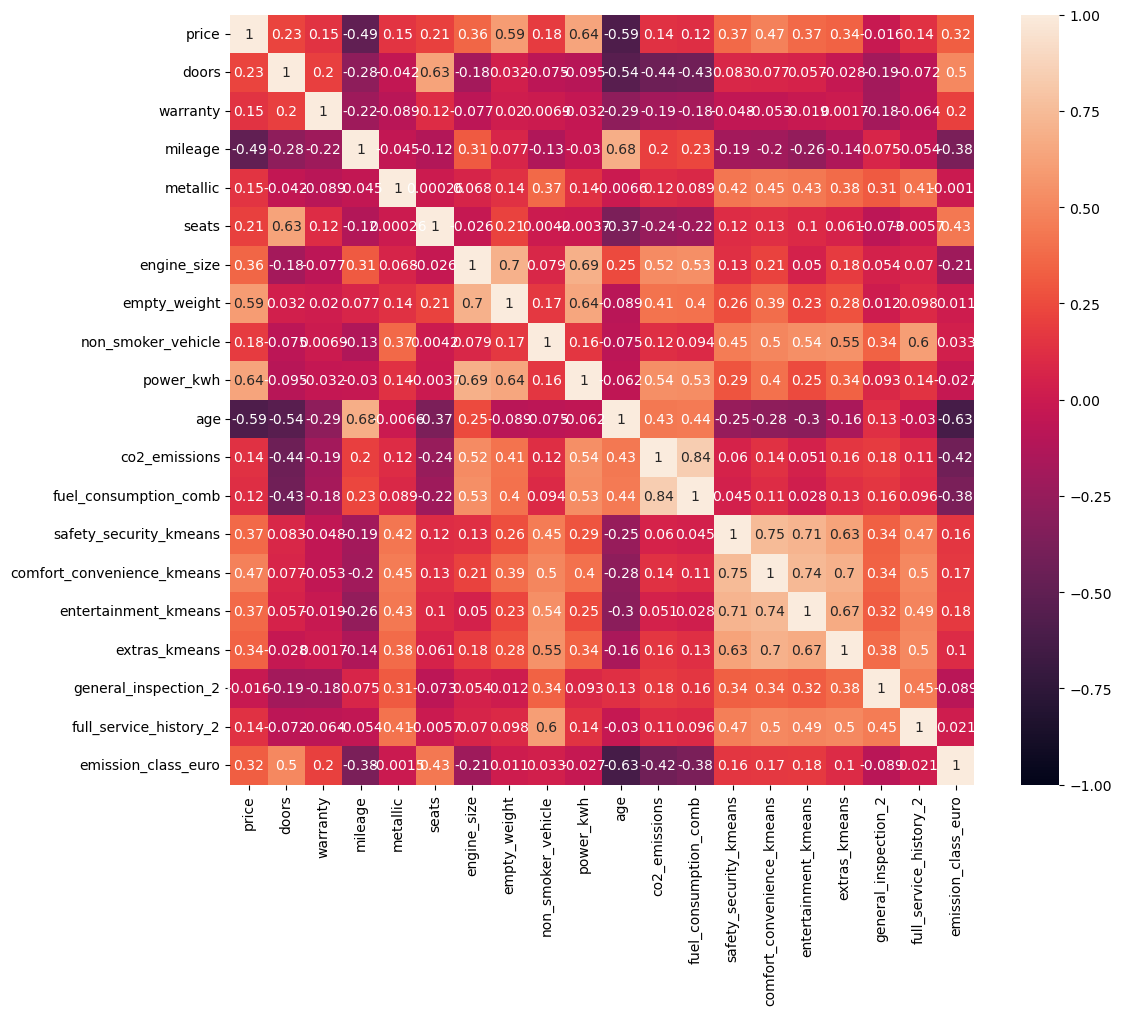

In [215]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1);


In [216]:
df_dummy = pd.get_dummies(data=df_final, drop_first=True).astype(float)
df_dummy

,price,doors,warranty,mileage,metallic,seats,engine_size,empty_weight,non_smoker_vehicle,power_kwh,...,country_ES,country_FR,country_IT,country_LU,country_NL,fuel_type_Diesel,fuel_type_LPG/CNG,upholstery_2_Other,previous_owner_2_Other,taxi_or_rental_car_2_Yes
0,16950.0,5.0,2.0,120200.0,1.0,5.0,1461.0,1270.0,0.0,66.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,46990.0,5.0,1.0,18995.0,0.0,5.0,1991.0,1455.0,0.0,225.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,16800.0,5.0,1.0,197000.0,1.0,5.0,2143.0,1545.0,0.0,100.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,4690.0,3.0,0.0,165000.0,1.0,4.0,1799.0,1465.0,1.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,26900.0,5.0,2.0,48900.0,1.0,5.0,1991.0,1450.0,0.0,140.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,27190.0,4.0,1.0,93757.0,0.0,5.0,1969.0,1683.0,0.0,140.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
28210,13000.0,5.0,0.0,114000.0,1.0,5.0,1969.0,1532.0,0.0,88.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
28213,5499.0,4.0,0.0,145000.0,0.0,5.0,2435.0,1357.0,0.0,125.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
28214,7300.0,3.0,2.0,96000.0,1.0,4.0,1560.0,1356.0,0.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [217]:
df_dummy.to_csv("final_scout_dummy.csv", index=False)

In [217]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19250 entries, 0 to 28215
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       19250 non-null  float64
 1   doors                       19250 non-null  float64
 2   warranty                    19250 non-null  float64
 3   mileage                     19250 non-null  float64
 4   metallic                    19250 non-null  float64
 5   seats                       19250 non-null  float64
 6   engine_size                 19250 non-null  float64
 7   empty_weight                19250 non-null  float64
 8   non_smoker_vehicle          19250 non-null  float64
 9   power_kwh                   19250 non-null  float64
 10  age                         19250 non-null  float64
 11  co2_emissions               19250 non-null  float64
 12  fuel_consumption_comb       19250 non-null  float64
 13  safety_security_kmeans      192

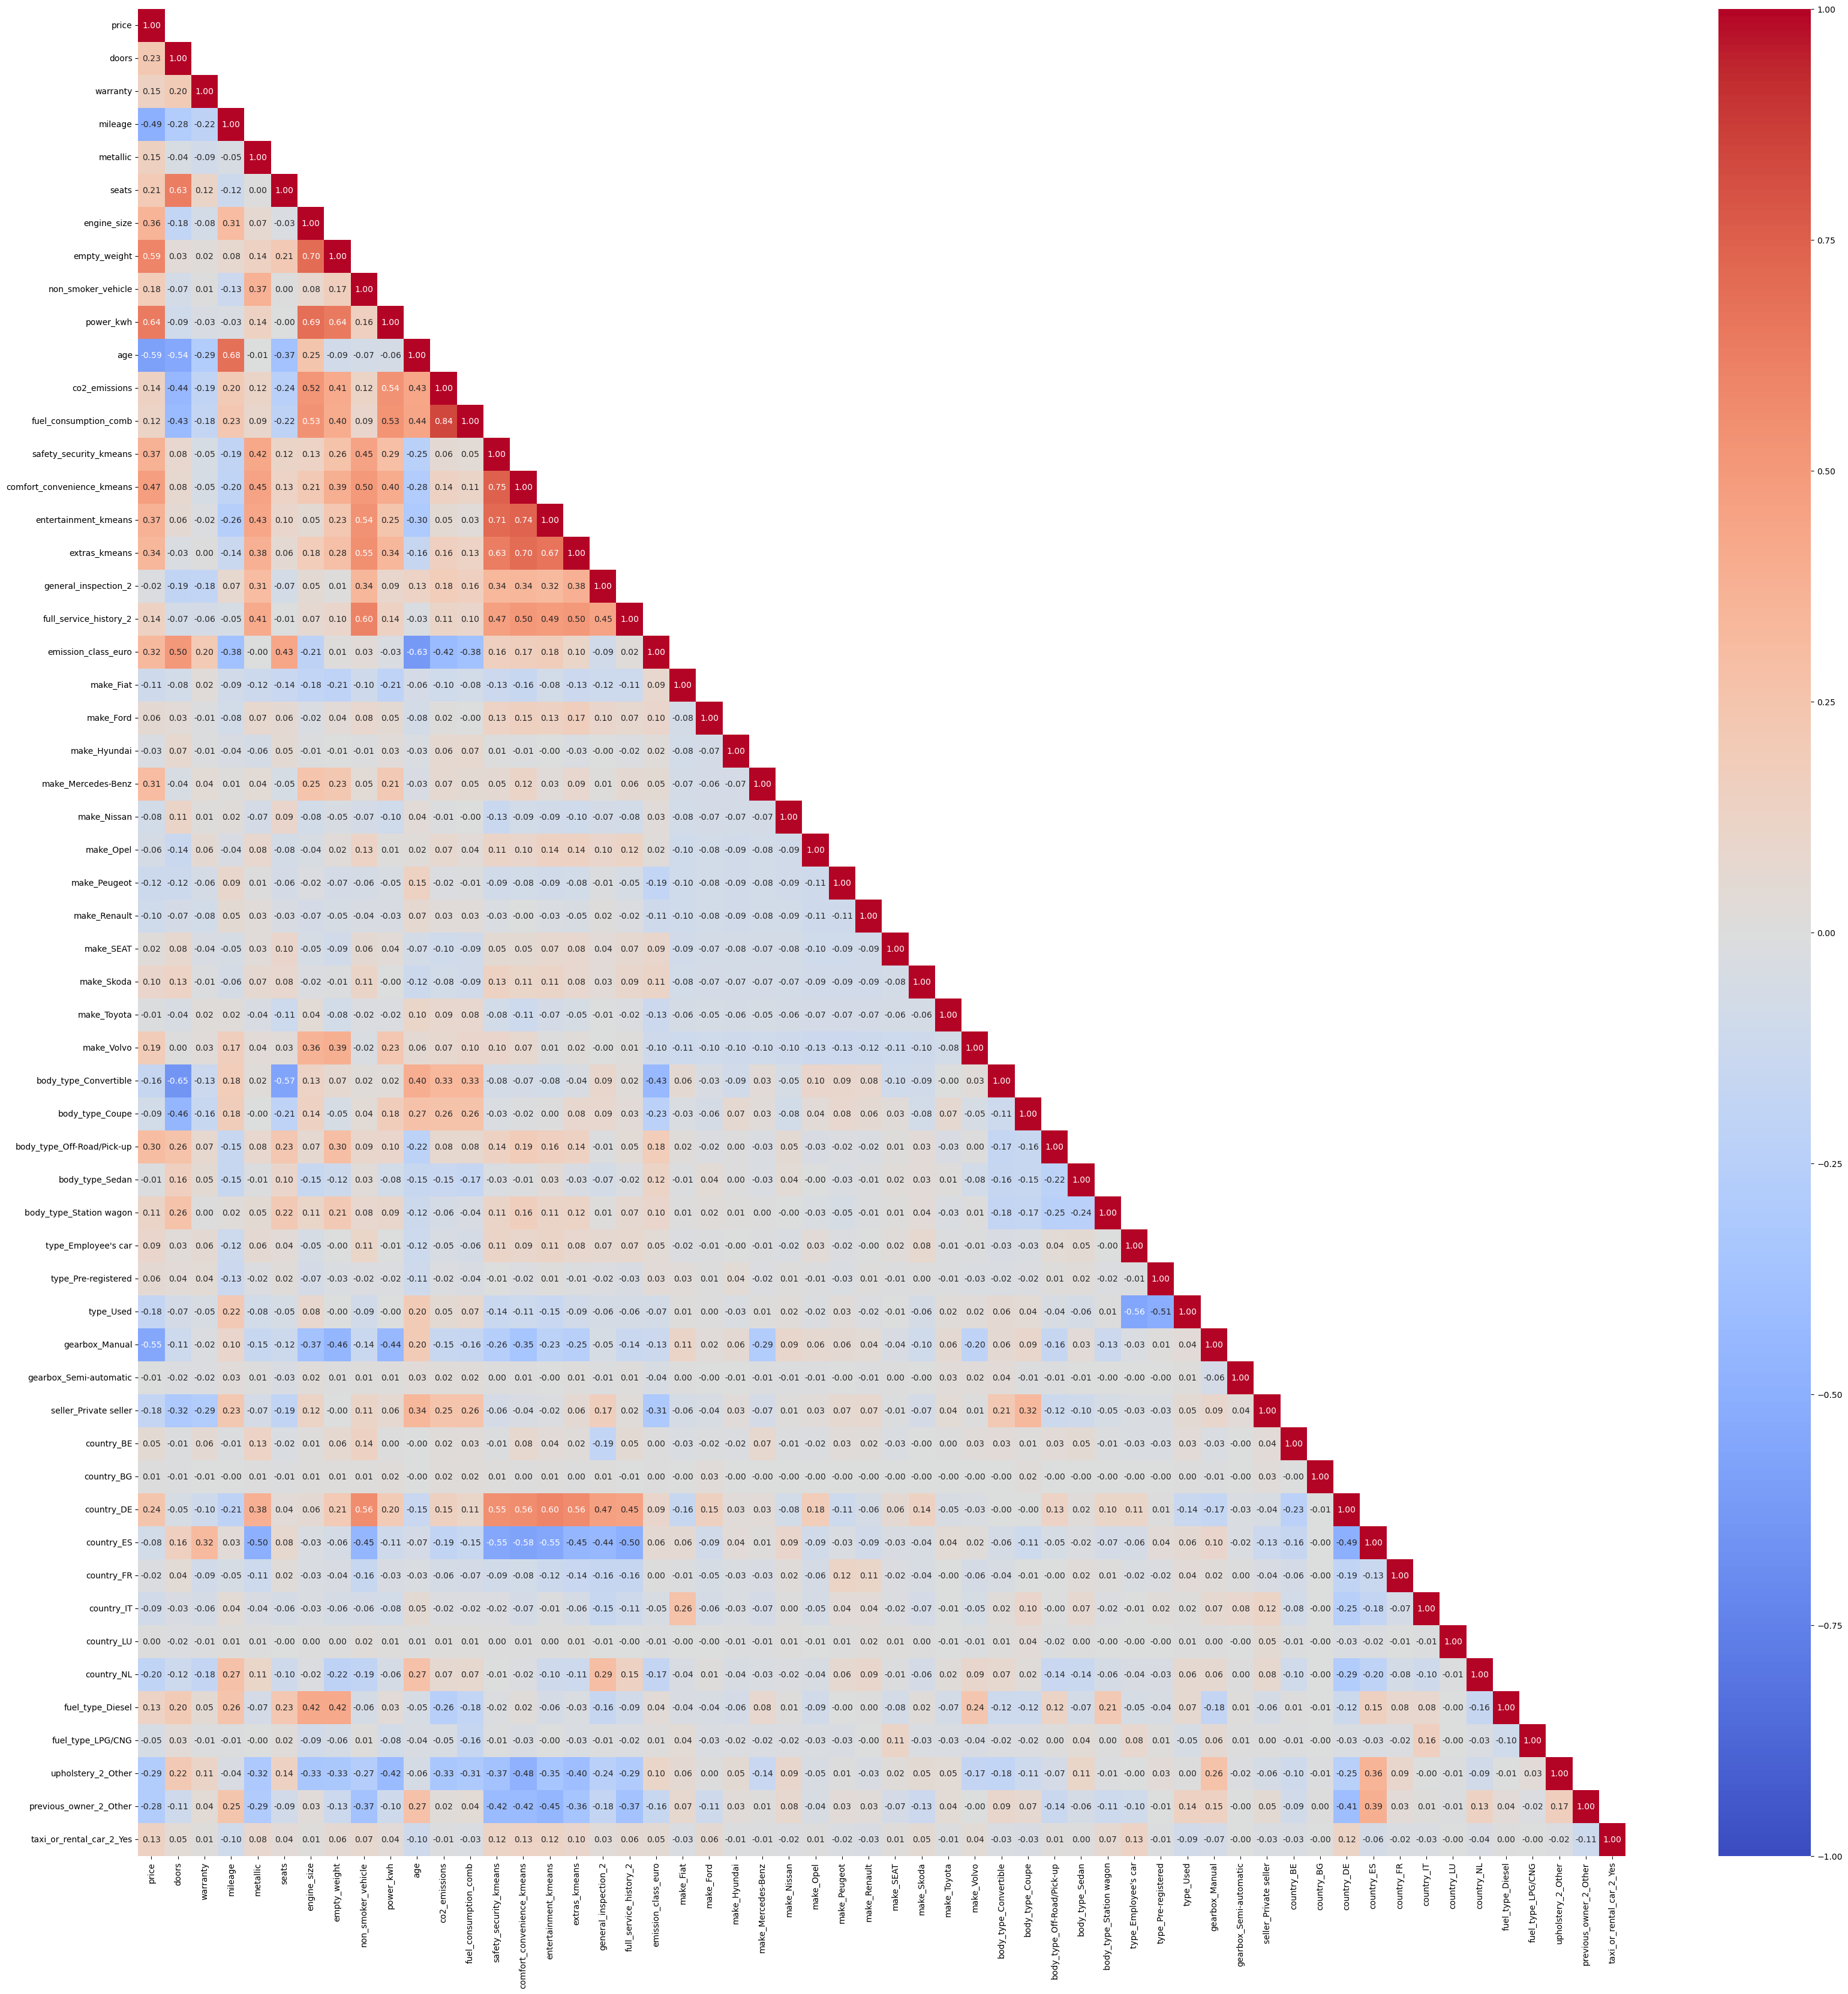

In [218]:
mymask = np.triu(df_dummy.corr(numeric_only=True),1)
plt.figure(figsize=(40, 40))
sns.heatmap(df_dummy.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1, mask=mymask, fmt = ".2f", cmap = "coolwarm" );

plt.savefig('heatmap.png')


In [219]:
#Victory!!!
